In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Maternal Health Risk Data Set.csv')

In [4]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
df=df.drop(columns='RiskLevel',axis=1)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


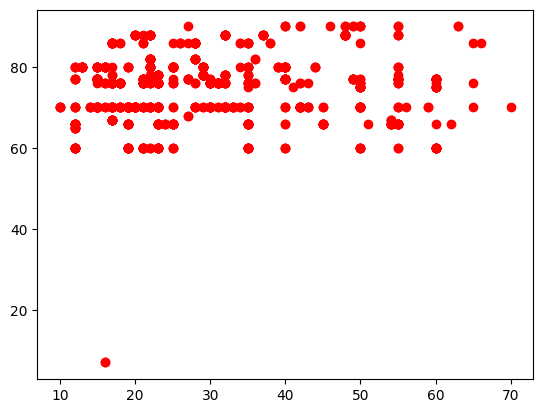

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['HeartRate'],color='red')

In [8]:
from sklearn.ensemble import IsolationForest

In [10]:
clf = IsolationForest(contamination=0.1)
clf.fit(df)
predictions = clf.predict(df)

In [11]:
predictions


array([ 1,  1,  1, ..., -1,  1,  1])

In [12]:
import numpy as np
abn_ind = np.where(predictions<0)
abn_ind

(array([   7,   20,   35,   91,  105,  108,  110,  111,  114,  117,  123,
         124,  127,  130,  131,  137,  166,  167,  180,  181,  182,  191,
         210,  232,  239,  248,  262,  263,  276,  277,  278,  317,  319,
         326,  337,  338,  339,  340,  341,  362,  363,  372,  373,  413,
         416,  417,  419,  422,  426,  428,  432,  435,  442,  458,  471,
         482,  486,  502,  506,  535,  538,  539,  553,  554,  583,  584,
         599,  603,  631,  638,  640,  644,  657,  658,  670,  679,  683,
         689,  772,  787,  789,  818,  849,  928,  955,  961,  962,  967,
         968,  970,  976,  982,  988,  992,  994,  995, 1000, 1001, 1002,
        1010, 1011]),)

In [13]:
X = df.values

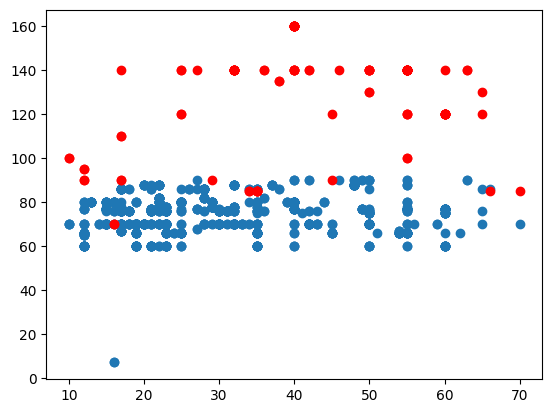

In [14]:
abn_ind = np.where(predictions<0)
plt.scatter(df['Age'],df['HeartRate'])
plt.scatter(X[abn_ind,0],X[abn_ind,1],color='red')

**DBSCAN**

In [15]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [16]:
X,y = make_circles(n_samples=750,noise=0.1,factor=0.3)

In [18]:
X

array([[ 0.44407557, -0.11618976],
       [-0.11101967, -0.04122346],
       [-0.00602858, -0.38945529],
       ...,
       [ 0.72354595,  0.94801669],
       [-0.98714093, -0.39861088],
       [-0.24736995,  0.12110281]])

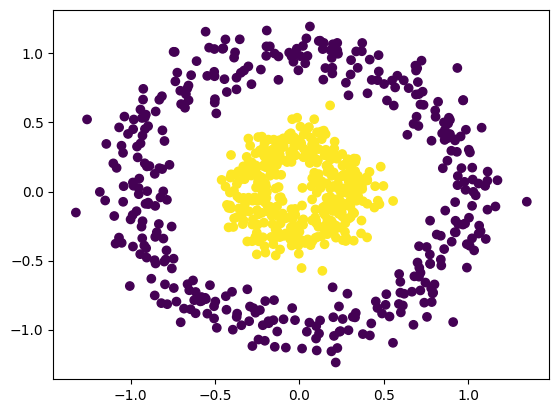

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.10)

In [21]:
dbscan.fit_predict(X)

array([ 0,  0,  0,  1,  0,  0,  0,  4,  0,  0, -1,  2,  0,  5,  1,  5,  0,
        0,  0,  3,  0,  4,  5,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  3,  5,  0,  0, -1,  0,  0, -1, -1,  1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  3, 10,  0,  5,  3,  0,  1, -1,  0,  0,  0,  5,
        0,  6, -1,  4,  0,  7, -1,  5,  0,  3,  4,  2,  4,  7, -1,  4,  0,
        3,  0,  0,  0,  3,  0,  0,  0,  0,  0,  1,  3,  0,  0,  0,  6,  0,
        0,  0,  5, -1,  1,  5,  6,  6,  0,  3,  3, -1,  0,  1,  0,  3,  5,
        0,  1,  0,  5, 10,  0,  6,  7,  0, -1,  0,  1,  5,  0,  0,  0,  9,
        1,  8,  6,  0,  0,  0,  8,  0,  3,  0,  4,  2,  0,  6,  0,  5,  8,
        0,  3,  0,  0,  0, 10,  0,  0, -1,  0,  3,  0,  5,  0,  0,  6,  6,
        0,  5,  2,  0,  0,  6,  6,  9,  4,  0,  0,  4,  0,  0,  6,  0,  0,
        0,  0,  4,  0,  3,  0,  0,  3,  5,  0,  0,  3,  0,  0,  6,  3,  0,
       -1,  0, -1,  0,  4,  5,  0,  3,  0,  0,  0,  3,  0,  0,  0,  3,  0,
        4,  3,  0,  0, -1

In [22]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  4,  0,  0, -1,  2,  0,  5,  1,  5,  0,
        0,  0,  3,  0,  4,  5,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  3,  5,  0,  0, -1,  0,  0, -1, -1,  1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  3, 10,  0,  5,  3,  0,  1, -1,  0,  0,  0,  5,
        0,  6, -1,  4,  0,  7, -1,  5,  0,  3,  4,  2,  4,  7, -1,  4,  0,
        3,  0,  0,  0,  3,  0,  0,  0,  0,  0,  1,  3,  0,  0,  0,  6,  0,
        0,  0,  5, -1,  1,  5,  6,  6,  0,  3,  3, -1,  0,  1,  0,  3,  5,
        0,  1,  0,  5, 10,  0,  6,  7,  0, -1,  0,  1,  5,  0,  0,  0,  9,
        1,  8,  6,  0,  0,  0,  8,  0,  3,  0,  4,  2,  0,  6,  0,  5,  8,
        0,  3,  0,  0,  0, 10,  0,  0, -1,  0,  3,  0,  5,  0,  0,  6,  6,
        0,  5,  2,  0,  0,  6,  6,  9,  4,  0,  0,  4,  0,  0,  6,  0,  0,
        0,  0,  4,  0,  3,  0,  0,  3,  5,  0,  0,  3,  0,  0,  6,  3,  0,
       -1,  0, -1,  0,  4,  5,  0,  3,  0,  0,  0,  3,  0,  0,  0,  3,  0,
        4,  3,  0,  0, -1

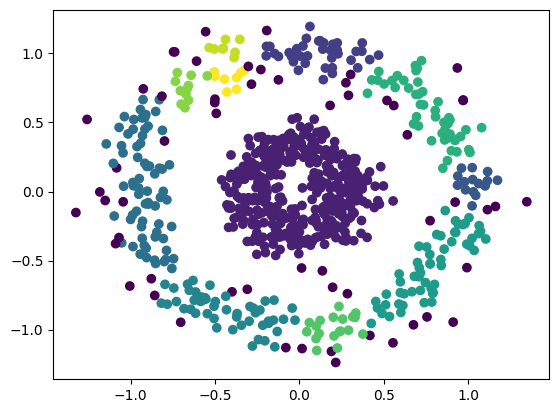

In [23]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

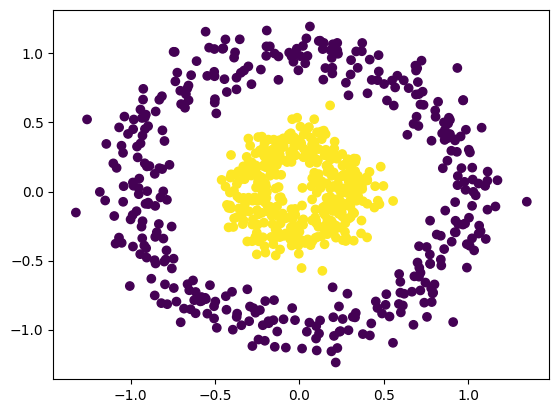

In [24]:
plt.scatter(X[:,0],X[:,1],c=y)

**Local outlier factor**

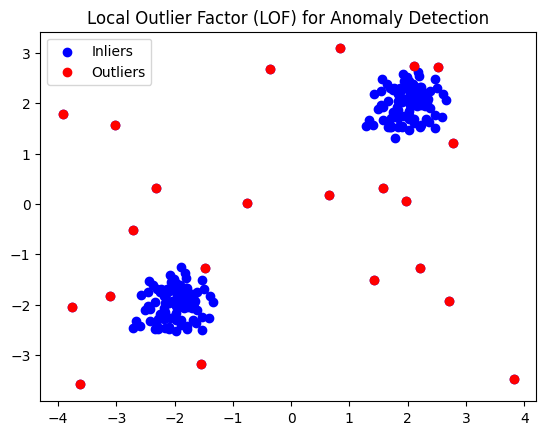

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# Plotting
plt.title("Local Outlier Factor (LOF) for Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], color='b', label="Inliers")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', label="Outliers")
plt.legend()
plt.show()